In [ ]:
import numpy as np
num_samples_per_class = 10000
negative_samples = np.random.multivariate_normal(
mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:
#Shuffling and Splitting the Data

indices = np.random.permutation(num_samples_per_class * 2)

shuffled_inputs = inputs[indices]
shuffled_targets = targets[indices]

train_inputs = shuffled_inputs[0:int(len(shuffled_inputs)*.8)]
train_targets = shuffled_targets[0:int(len(shuffled_targets)*.8)]

test_inputs = shuffled_inputs[int(len(shuffled_inputs)*.8):]
test_targets = shuffled_targets[int(len(shuffled_targets)*.8):]

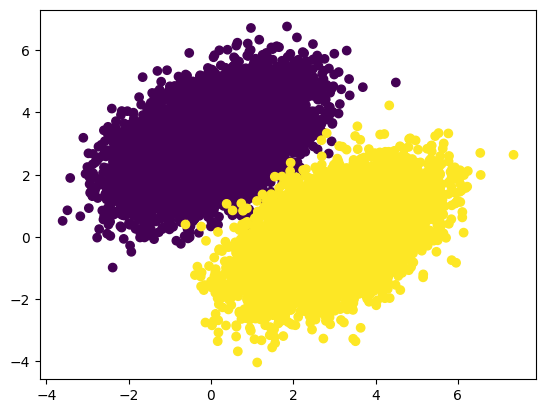

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
import tensorflow as tf
input_dim = 2
output_dim = 1
hidden_dim = 5 #hidden layer with 5 nodes and relu activation

W1 = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, hidden_dim)))
b1 = tf.Variable(initial_value=tf.zeros(shape=(hidden_dim,)))

W2 = tf.Variable(initial_value=tf.random.uniform(shape=(hidden_dim, output_dim)))
b2 = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    hidden_layer = tf.nn.relu(tf.matmul(inputs, W1) + b1) #Hidden layer
    return tf.nn.sigmoid(tf.matmul(hidden_layer, W2) + b2)  #Output layer

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)


In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W1, grad_loss_wrt_b1, grad_loss_wrt_W2, grad_loss_wrt_b2 = tape.gradient(
        loss, [W1, b1, W2, b2])
    W1.assign_sub(grad_loss_wrt_W1 * learning_rate)
    b1.assign_sub(grad_loss_wrt_b1 * learning_rate)
    W2.assign_sub(grad_loss_wrt_W2 * learning_rate)
    b2.assign_sub(grad_loss_wrt_b2 * learning_rate)
    return loss

In [ ]:
for step in range(400):
  loss = training_step(train_inputs, train_targets)
  #print(f"Loss at step {step}: {loss:.4f}")


In [ ]:
train_predictions = model(train_inputs)
test_predictions = model(test_inputs)

In [ ]:
#np.unique(test_predictions)
np.min(test_predictions)

0.0013666363

In [ ]:
train_predictions_binary = train_predictions.numpy() > 0.5 #Converts to Binary
test_predictions_binary = test_predictions.numpy() > 0.5

#Train
train_accuracy = np.mean(train_predictions_binary == train_targets)
print(f"Training Accuracy:",train_accuracy*100,"%")
#Test
test_accuracy = np.mean(test_predictions_binary == test_targets)
print(f"Testing Accuracy:",test_accuracy*100,"%")

Training Accuracy: 99.7875 %
Testing Accuracy: 99.8 %


Learning Rate: 0.1
---
Training Accuracy: 99.6875 %

Testing Accuracy: 99.75 %
Learning Rate: 0.05
---
Training Accuracy: 99.0625 %

Testing Accuracy: 99.25 %
Learning Rate: 0.5
---
Training Accuracy: 99.85000000000001 %

Testing Accuracy: 99.8 %